In [2]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)
sqlcontext=SQLContext(sc)

In [3]:
df=spark.read.csv("purchasedata.csv",header=True,inferSchema=True)
df.show()

+---+------+---------+
|Age|Salary|Purchased|
+---+------+---------+
| 59| 88000|        0|
| 35| 61000|        1|
| 37| 70000|        0|
| 52| 21000|        0|
| 48|141000|        1|
| 37| 93000|        0|
| 37| 62000|        1|
| 48|138000|        0|
| 41| 79000|        1|
| 37| 78000|        0|
| 39|134000|        0|
| 49| 89000|        0|
| 55| 39000|        0|
| 37| 77000|        1|
| 35| 57000|        1|
| 36| 63000|        1|
| 42| 73000|        0|
+---+------+---------+



In [4]:
#for quick analysis 
# FOR AGE COLUMN
mean=df.groupBy("Purchased").agg({"Age":"mean"})
variance=df.groupBy("Purchased").agg({"Age":"variance"})
std=df.groupBy("Purchased").agg({"Age":"std"})
mean.show(),variance.show(),std.show()

+---------+-----------------+
|Purchased|         avg(Age)|
+---------+-----------------+
|        1|38.42857142857143|
|        0|             45.5|
+---------+-----------------+

+---------+------------------+
|Purchased|     variance(Age)|
+---------+------------------+
|        1|21.952380952380953|
|        0| 67.16666666666667|
+---------+------------------+

+---------+-----------------+
|Purchased|      stddev(Age)|
+---------+-----------------+
|        1| 4.68533680244878|
|        0|8.195527235429498|
+---------+-----------------+



(None, None, None)

In [5]:
#for further processing
mean_age_1=mean.collect()[0][1]
mean_age_0=mean.collect()[1][1]
var_age_1=variance.collect()[0][1]
var_age_0=variance.collect()[1][1]
std_age_1=std.collect()[0][1]
std_age_0=std.collect()[1][1]

In [6]:
mean=df.groupBy("Purchased").agg({"Salary":"mean"})
variance=df.groupBy("Purchased").agg({"Salary":"variance"})
std=df.groupBy("Purchased").agg({"Salary":"std"})
mean.show(),variance.show(),std.show()

+---------+-----------------+
|Purchased|      avg(Salary)|
+---------+-----------------+
|        1|77142.85714285714|
|        0|          82300.0|
+---------+-----------------+

+---------+--------------------+
|Purchased|    variance(Salary)|
+---------+--------------------+
|        1| 8.628095238095237E8|
|        0|1.3173444444444444E9|
+---------+--------------------+

+---------+------------------+
|Purchased|    stddev(Salary)|
+---------+------------------+
|        1| 29373.61952176687|
|        0|36295.239969511764|
+---------+------------------+



(None, None, None)

In [7]:
mean_salary_1=mean.collect()[0][1]
mean_salary_0=mean.collect()[1][1]
var_salary_1=variance.collect()[0][1]
var_salary_0=variance.collect()[1][1]
std_salary_1=std.collect()[0][1]
std_salary_0=std.collect()[1][1]

In [8]:
tot_size=df.count()
tot_size


17

In [9]:
prob_1=(df.filter(df["Purchased"]==1).count())/tot_size
prob_0=(df.filter(df["Purchased"]==0).count())/tot_size

prob_0,prob_1

(0.5882352941176471, 0.4117647058823529)

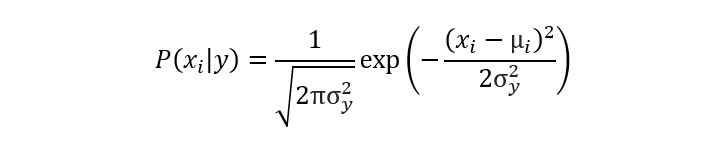
gaussian naive bayes formula

In [10]:
# to check if a person with "Age":38 and "Salary":71000 will buy a product or not
import math

In [11]:
# age 38|yes
age_yes=(1/math.sqrt(2*math.pi*var_age_1))*math.exp(-0.5*((38-mean_age_1)**2)/var_age_1)
age_yes

0.08479151603350477

In [12]:
# age 38|no
age_no=(1/math.sqrt(2*math.pi*var_age_0))*math.exp(-0.5*((38-mean_age_0)**2)/var_age_0)
age_no

0.03202425896032866

In [13]:
#salary 71000|yes
salary_yes=(1/math.sqrt(2*math.pi*var_salary_1))*math.exp(-0.5*((71000-mean_salary_1)**2)/var_salary_1)
salary_yes

1.3287881202425882e-05

In [14]:
#salary 71000|yes
salary_no=(1/math.sqrt(2*math.pi*var_salary_0))*math.exp(-0.5*((71000-mean_salary_0)**2)/var_salary_0)
salary_no

1.0471583113637713e-05

In [21]:
probability_yes=age_yes*salary_yes*prob_1
probability_no=age_no*salary_no*prob_0
probability_yes,probability_no

(4.6393512612868263e-07, 1.97261581973964e-07)

In [22]:
#normalized probability
Probability_purchase_yes=probability_yes/(probability_yes+probability_no)
Probability_purchase_no=probability_no/(probability_yes+probability_no)


In [23]:
Probability_purchase_yes,Probability_purchase_no

(0.7016597639452549, 0.29834023605474513)